In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random
from pprint import pprint


In [ ]:
def entropy(y):
    
    _, counts = np.unique(y, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
entropy(iris.target)

1.584962500721156

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
entropy(y_test)

1.5775765559836064

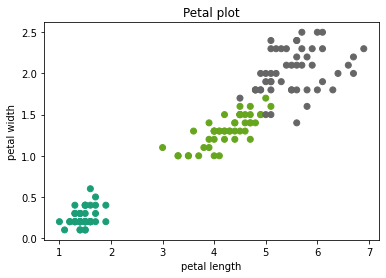

In [ ]:
plt.scatter(iris.data[:,2:3],iris.data[:,3:4],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.drop(['target'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
def Q(R): # Опишем функцию качества, т.е. нахождение наибольшего IG для каждого разбиения дерева
  grid = np.linspace(R.min(), R.max(), 10)
  best_t = grid[0]
  best_IG = -1
  for t in grid:
    sample1 = df[R < t]
    sample2 = df[R >= t]
    IG = entropy(df['species']) - ((sample1['species'].count() / R.count()) * entropy(sample1['species']) + (sample2['species'].count() / R.count()) * entropy(sample2['species']))
    # print (IG)
    if IG > best_IG:
      best_t, best_IG  = t, IG
  return best_t

Реализуем теперь алгоритм классификации выбранного датасета используя дерево решений. Для начала попробуем алгоритм с минимальной глубиной дерева равеной 5

In [ ]:
def SplitNode(m,R_m): # m - номер уровня дерева, R_m - выборка значений признака для разеделения
  if m<5:
    best_t = Q(R_m)
    sample1 = df[R < best_t]
    sample2 = df[R >= best_t]
    SplitNode(m,sample1)
    SplitNode(m,sample2)
    m+=1
  else:
    return None

In [ ]:
def binary_tree(X_train):
  m=1
  best_t = Q(X_train)
  sample1 = df[R < best_t]
  sample2 = df[R >= best_t]
  SplitNode(m,sample1)
  SplitNode(m,sample2)
  